# Using SVM to detect cancerous cells
> We will use Support Vector Machines (SVM) to build and train a model using human cell records, and classify cells so as to realize whether the samples are benign or malignant. 

- toc: true
- branch: master
- badges: true
- comments: true
- categories: [svm, modeling]

In this blog post, we will use Support Vector Machines (SVM) to build and train a model using human cell records, and classify cells so as to realize whether the samples are benign or malignant.  
The dataset ([download here](https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv)) we will be working with consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:
- ID: Patient ID
- Clump - Clump thickness
- UnifSize - Uniformity of cell size
- UnifShape - Uniformity of cell shape
- MargAdh - Marginal adhesion
- SingEpiSize - Single epithetical cell size
- BareNuc - Bare nuclei
- BlandChrom - Bland chromatin
- NormNucl - Normal nucleoli
- Mit - Mitoses
- Class - Benign or malignant

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized even when the data is not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the droup to which a new record should belong.

In [95]:
# import libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [96]:
# read the data into a pandas dataframe
df = pd.read_csv('cell_samples.csv')
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [97]:
# dimensions of the dataframe
df.shape

(699, 11)

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.  
The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4)

Let's look at the distribution of the classes based on Clump thickness and Uniformity of cell size.

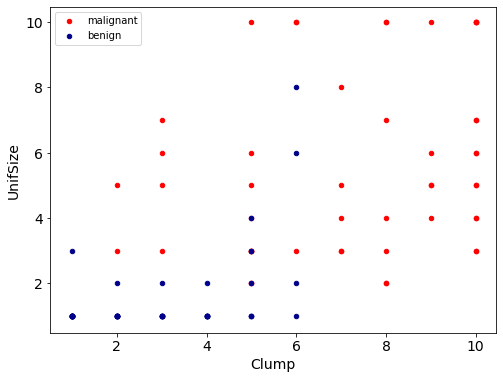

In [98]:
ax = df[df['Class'] == 4][0:50].plot(kind='scatter', x='Clump', y='UnifSize', color='Red', label='malignant')
df[df['Class'] == 2][0:50].plot(figsize=(8,6), fontsize=14, kind='scatter', x='Clump', y='UnifSize', color='DarkBlue', label='benign', ax=ax)
plt.ylabel('UnifSize', fontsize=14)
plt.xlabel('Clump', fontsize=14)
plt.show()

---
### Preprocessing the data

In [99]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

Let's drop the rows that have non numerical values in the BareNuc column. Then we will convert the data type into int

In [100]:
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

Create the feature set.

In [101]:
feature_df = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

We need the model to predict the value of Class (i.e. benign=2  or malignant=4). As this target can have one of only two possible values, we need to change its measurement to reflect this.

In [102]:
df['Class'] = df['Class'].astype('int')
y = np.asarray(df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

---
### Train/Test split

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


---
### Modeling
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional spaceis called kerneling. The mathrmatical function used for the transformation is known as the kernel function, and can be of different types, such as:
1. Linear
2. Polynomial
3. Radial Basis Function (RBF)
4. Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different function in turn and compare the results. Let's use the Radial Basis Function for now.

In [104]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

After being fitted, the model can then be used to predict new values.

In [105]:
yhat = clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

---
### Evaluation

In [106]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [107]:
def plot_confusion_matrix(cm, classes, normalize=False,
                         title='Confusion matrix', cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    '''
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


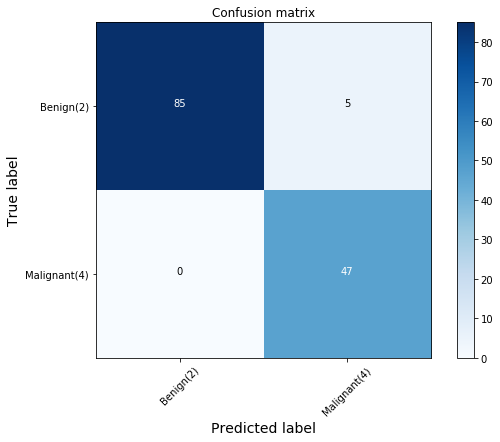

In [108]:
# compute comfusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat))

# plot non-normalized confusion martix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'], normalize=False)

In [109]:
# f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.9639038982104676

In [110]:
# jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.9635036496350365

Let's try to rebuild the model with other kernel function and check the accuracy.

Accracy using the linear kernel.

In [111]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.9639
Jaccard score: 0.9635


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Accracy using the polynomial kernel.

In [112]:
clf3 = svm.SVC(kernel='poly')
clf3.fit(X_train, y_train) 
yhat3 = clf3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat3))

Avg F1-score: 0.9711
Jaccard score: 0.9708


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


Accracy using the sigmoid kernel.

In [113]:
clf4 = svm.SVC(kernel='sigmoid')
clf4.fit(X_train, y_train) 
yhat4 = clf4.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat4))

Avg F1-score: 0.3715
Jaccard score: 0.3942


C:\Users\prana\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


As we can see, the polynomial function results in the most accurate model.

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Confusion matrix, without normalization
[[86  4]
 [ 0 47]]


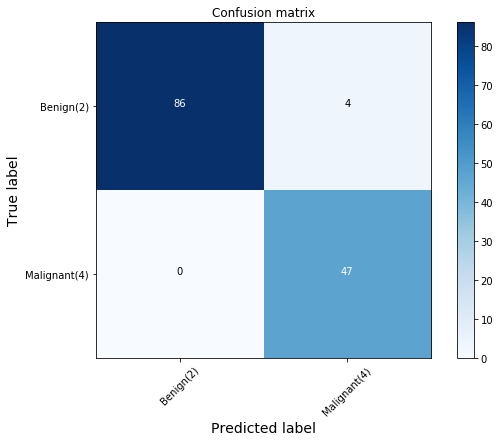

In [114]:
# compute comfusion matrix
cnf_matrix = confusion_matrix(y_test, yhat3, labels=[2,4])
np.set_printoptions(precision=2)

print(classification_report(y_test, yhat3))

# plot non-normalized confusion martix
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'], normalize=False)

---
### Result
The first row is for the cells that are benign in the test set. Out of 137 cells, 90 are benign, and the model correctly predicted 86 of them. Hence, this is an accurate model.  
The second row is for the cells that are malignant. There are 47 malignant cells in the test set and the model predicted all of them accurately. That is a perfect result.